In [ ]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Function that reads and returns data

In [12]:
use_module = False
if use_module:
    from utils import get_data_var_from_netCDF
else:
    var_name_tabel = """Posible data variables: 
    lat: TLAT 
    lon: TLON 
    snow thickness: hs
    ice thickness: hi
    snow surface temperature: Tsfc
    Ice type: FYarea"""

    def get_data_var_from_netCDF(f_path = None, var_name = None, coords = None):
        # If no varable name is given, print the possibilities
        if (var_name == None) | (f_path == None):
            print('usage: get_data_var_from_netCDF(f_path = [file path], var_name = [variable name], <coords = [j, i]>)\n')
            print(var_name_tabel)
            return
        # If a set of coordinates is given, return the indexed data point
        if coords:
            if isinstance(coords, list):
                # converting list to array
                coords = np.array(coords)
                return xr.open_dataset(f_path)[var_name].values[tuple(coords)]
            else:
                print("Variable 'coords' must be of type 'list'. E.g.: coords = [1,2]")
        # If no coordinates are given, return the full data array
        else:
            return xr.open_dataset(f_path)[var_name].values

# Example usage

In [ ]:
# Path to data file
f_path = "/media/atj/Seagate Expansion Drive/projects/hycomopr-tools/data/199612/iceh_inst.1996-12-01-00000.nc"

In [ ]:
# Print usage 
get_data_var_from_netCDF()

usage: get_data_var_from_netCDF(f_path = [file path], var_name = [variable name], <coords = [j, i]>)

Posible data variables: 
    lat: TLAT 
    lon: TLON 
    snow thickness: hs
    ice thickness: hi
    snow surface temperature: Tsfc
    Ice type: FYarea


In [ ]:
# Get data array
get_data_var_from_netCDF(f_path = f_path, var_name = 'Tsfc')

FileNotFoundError: [Errno 2] No such file or directory: b'C:\\media\\atj\\Seagate Expansion Drive\\projects\\hycomopr-tools\\data\\199612\\iceh_inst.1996-12-01-00000.nc'

In [ ]:
# Get data point
get_data_var_from_netCDF(f_path = f_path, var_name = 'Tsfc', coords = [0,100,200])

FileNotFoundError: [Errno 2] No such file or directory: b'C:\\media\\atj\\Seagate Expansion Drive\\projects\\hycomopr-tools\\data\\199612\\iceh_inst.1996-12-01-00000.nc'

# Example plot

In [13]:
data = np.squeeze(get_data_var_from_netCDF(f_path = f_path, var_name = 'Tsfc'))

NameError: name 'get_data_var_from_netCDF' is not defined

NameError: name 'data' is not defined

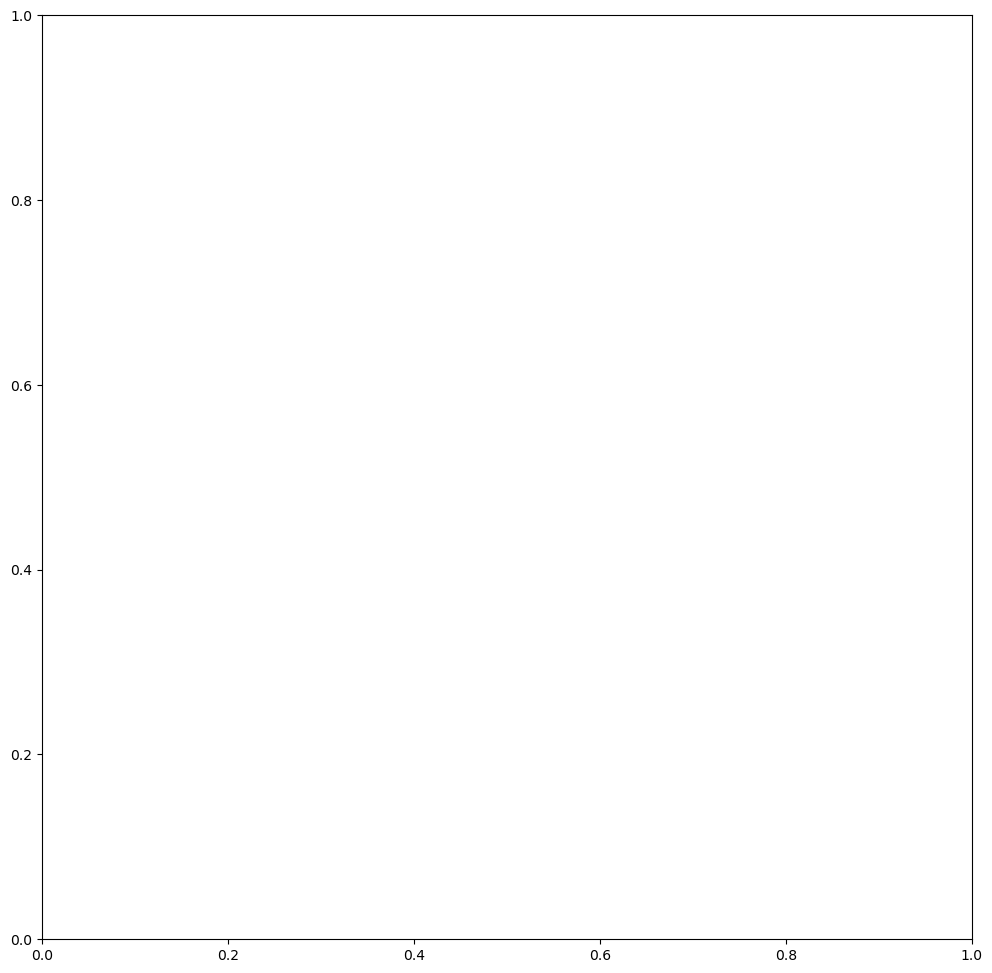

In [14]:
fig, ax = plt.subplots(figsize=(12,12))
cs = ax.contourf(data);
fig.colorbar(cs)